### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Importing libraries 

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading dataset
#### Application dataset

In [189]:
#reading application data
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Previous application dataset

In [190]:
#previous application data
prev_app_data = pd.read_csv('previous_application.csv')
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
#shape of application dataset
app_data.shape

(307511, 122)

In [192]:
# getting info of the Application dataset
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [193]:
# describing the numerical columns of application dataset to get the mean, median, min max etc.
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [194]:
#shape of Previous application dataset
prev_app_data.shape

(1670214, 37)

In [195]:
# getting info of the previous application dataset
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [196]:
# to display more numbers of rows and columns in output cell
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [197]:
# describing the numerical columns of previous application dataset to get the mean, median, min max etc.
prev_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### 2. Data Cleaning
#### Checking for the null values in Application dataset

In [198]:
#Checking for the % of the Null values present in columns of application dataset
app_data_null = app_data.isnull().sum()*100/307511
app_data_null[app_data_null>0].sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

#### Checking for the null values in Previous Application dataset

In [199]:
prev_app_data_null = prev_app_data.isnull().sum()*100/len(prev_app_data)
prev_app_data_null[prev_app_data_null>0].sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
RATE_DOWN_PAYMENT            53.636480
AMT_DOWN_PAYMENT             53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

#### Dropping columns having more than 40% Null values
#### Application data set

In [200]:
#getting the columns having less than 40% null values to retain those columns in dataset
cols=app_data_null[app_data_null<40].index
cols

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [204]:
#checking the shape of the application dataset after dropping the columns
app_data = app_data[cols]
print(app_data.shape)
app_data.head()

(307511, 73)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Previous application data

In [206]:
#dropping the columns and checking the shape of the application dataset after dropping the columns
cols = prev_app_data_null[prev_app_data_null<40].index
prev_app_data = prev_app_data[cols]
print(prev_app_data.shape)
prev_app_data.head()

(1670214, 26)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


### a. Imputing missing values 
#### Appication dataset

In [208]:
app_data_null[app_data_null<40].sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

#### Categorical variables

In [209]:
#value counts of the NAME_TYPE_SUITE column
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [210]:
#As 'Unaccompanied' is occuring most of the time (Mode), we can impute null with this value.
app_data.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace=True)
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [217]:
#checking for the null values present in the OCCUPATION TYPE column
print(app_data.OCCUPATION_TYPE.value_counts())
print('**Null values count:**',app_data.OCCUPATION_TYPE.isnull().sum())

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
**Null values count:** 96391


In [218]:
# as we can see there are around 96391 values missing for this variable. It can be risky to replace null values 
# with the mode or some other values. Let's fill missing values with the value 'Missing'
app_data.OCCUPATION_TYPE.fillna('Missing',inplace=True)
app_data.OCCUPATION_TYPE.value_counts()

Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### Numerical variables

In [219]:
#if look around the description of the application dataset columns attribute AMT_REQ_CREDIT_BUREAU_HOUR/DAY/WEEK/MON/QRT/YEAR', 
#around 75% of data is having values as zeroes. 
# we can impute the missing values as the median of the values of these columns.
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]=app_data[[
    'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(float(0))


In [220]:
app_data[['EXT_SOURCE_2','EXT_SOURCE_3','AMT_GOODS_PRICE']].describe()

,EXT_SOURCE_2,EXT_SOURCE_3,AMT_GOODS_PRICE
count,3.068510e+05,246546.000000,3.072330e+05
mean,5.143927e-01,0.510853,5.383962e+05
std,1.910602e-01,0.194844,3.694465e+05
min,8.173617e-08,0.000527,4.050000e+04
25%,3.924574e-01,0.370650,2.385000e+05
50%,5.659614e-01,0.535276,4.500000e+05
75%,6.636171e-01,0.669057,6.795000e+05
max,8.549997e-01,0.896010,4.050000e+06


In [221]:
# for the column EXT_SOURCE_3, missing values can be imputed by the median value of it. since it's float variable.
median_2 = app_data['EXT_SOURCE_2'].median()
app_data['EXT_SOURCE_2'].fillna(median_2,inplace=True)
median_3 = app_data['EXT_SOURCE_3'].median()
app_data['EXT_SOURCE_3'].fillna(median_3,inplace=True)
median_4 = app_data['AMT_GOODS_PRICE'].median()
app_data['AMT_GOODS_PRICE'].fillna(median_4,inplace=True)

In [222]:
app_data[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [223]:
# as we can see for the above 4 columns almost 75% of the values are zeroes. 
# we can replace the missing values in these columns as zeroes.
app_data[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
          'DEF_60_CNT_SOCIAL_CIRCLE']]=app_data[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                                 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].fillna(float(0))

In [225]:
#checking for the null values after imputing null values
app_data.isnull().sum()*100/len(app_data)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


#### Previous application dataset

In [226]:
prev_app_data.isnull().sum()*100/len(prev_app_data)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [227]:
prev_app_data[['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT']].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,1.297979e+06,1.284699e+06,1.297984e+06
mean,1.595512e+04,2.278473e+05,1.605408e+01
std,1.478214e+04,3.153966e+05,1.456729e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.321780e+03,5.084100e+04,6.000000e+00
50%,1.125000e+04,1.123200e+05,1.200000e+01
75%,2.065842e+04,2.340000e+05,2.400000e+01
max,4.180581e+05,6.905160e+06,8.400000e+01


In [228]:
median_annuity = prev_app_data['AMT_ANNUITY'].median()
median_good_price = prev_app_data['AMT_GOODS_PRICE'].median()
median_CNT_PAYMENT = prev_app_data['CNT_PAYMENT'].median()
prev_app_data['AMT_ANNUITY'].fillna(median_annuity,inplace=True)
prev_app_data['AMT_GOODS_PRICE'].fillna(median_good_price,inplace=True)
prev_app_data['CNT_PAYMENT'].fillna(median_CNT_PAYMENT,inplace=True)

In [229]:
prev_app_data.isnull().sum()*100/len(prev_app_data)

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


In [230]:
# in the attribute DAYS_EMPLOYED there is some default value as 365243. checking the frequency of that value in dataset
# and will take some action on basis of the frequency
app_data[app_data.DAYS_EMPLOYED == 365243]['DAYS_EMPLOYED'].value_counts()

365243    55374
Name: DAYS_EMPLOYED, dtype: int64

#### Fixing invalid value in Days_employed attribute

In [231]:
#it's in vary high number and positive, converting this number to missing category as zero (it will not be taken in the analysis)
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].replace(365243,0)
app_data[app_data.DAYS_EMPLOYED == 365243]['DAYS_EMPLOYED'].value_counts()

Series([], Name: DAYS_EMPLOYED, dtype: int64)

### b. Checking columns data type & changing into appropriate datatype
#### Application dataset

In [237]:
app_data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [238]:
app_data.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [239]:
#These below colummns data type should be changed to Integer as these are in float format.

#DAYS_REGISTRATION,CNT_FAM_MEMBERS, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, 
#        DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
#       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
#       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR''
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].astype(int, errors='ignore')
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype(int, errors='ignore')
app_data['OBS_30_CNT_SOCIAL_CIRCLE'] = app_data['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
app_data['DEF_30_CNT_SOCIAL_CIRCLE'] = app_data['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
app_data['OBS_60_CNT_SOCIAL_CIRCLE'] = app_data['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
app_data['DEF_60_CNT_SOCIAL_CIRCLE'] = app_data['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_DAY'] = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_MON'] = app_data['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors='ignore')
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors='ignore')

In [240]:
app_data.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [241]:
app_data.select_dtypes('int').columns

Index(['DAYS_REGISTRATION', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

### c. Checking for outliers (Application dataset)

In [242]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383163e+05,0.020868,-16036.995067,-1954.848123,-4986.120327,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.692890e+05,0.013831,4363.988632,2307.068896,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.00000

**From the above description we can infer that below 4 columns have outliers present and might have significance role in data analysis part for the deafulter.**

1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. AMT_GOODS_PRICE

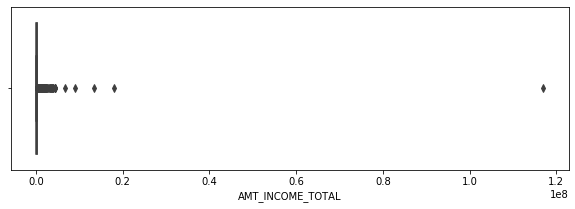

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns
# AMT_INCOME_TOTAL
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

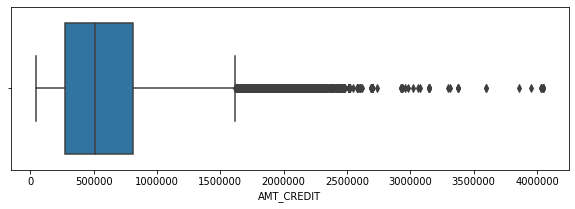

In [244]:
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_CREDIT'])
plt.show()

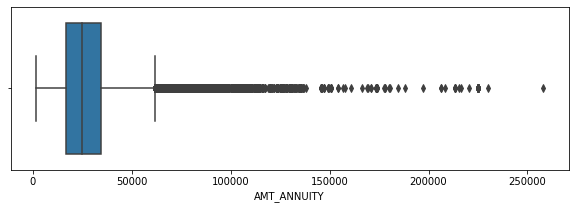

In [245]:
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

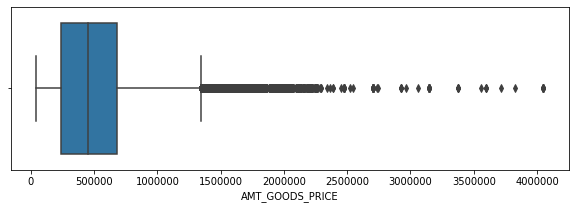

In [246]:
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()

In [247]:
#condiering the top 99%tile of the values and excluding remaining 1% outliers.
app_data=app_data[app_data['AMT_INCOME_TOTAL']<np.nanpercentile(app_data['AMT_INCOME_TOTAL'], 99)]
app_data=app_data[app_data['AMT_CREDIT']<np.nanpercentile(app_data['AMT_CREDIT'], 99)]
app_data=app_data[app_data['AMT_ANNUITY']<np.nanpercentile(app_data['AMT_ANNUITY'], 99)]
app_data=app_data[app_data['AMT_GOODS_PRICE']<np.nanpercentile(app_data['AMT_GOODS_PRICE'], 99)]

In [248]:
# Application dataset shape after removing the top 1% outliers.
app_data.shape

(294469, 73)

**Box plot Visualization of the attribute of application dataset after excluding top 1% outliers**

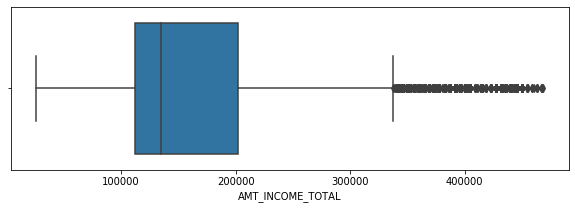

In [249]:
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

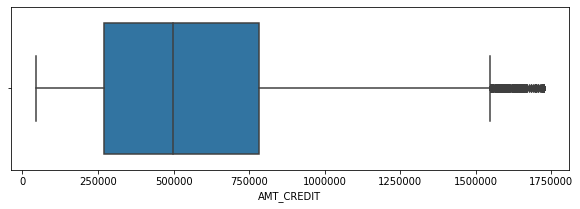

In [250]:
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_CREDIT'])
plt.show()

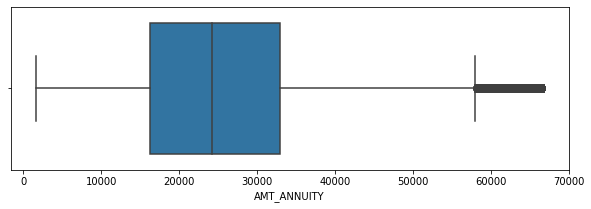

In [251]:
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

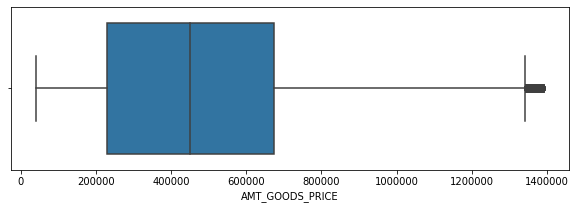

In [252]:
plt.figure(figsize=(10,3))
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()

**As the value of Number of children is high as high 19, consider 4 or more number of childrens into single category.**

In [253]:
app_data['CNT_CHILDREN'].value_counts()

0     206347
1      58491
2      25557
3       3551
4        399
5         82
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [255]:
#4 or more children, putting into 4 number category
app_data['CNT_CHILDREN'] = app_data['CNT_CHILDREN'].replace([5,6,7,8,9,10,11,12,14,19],4)
app_data['CNT_CHILDREN'].value_counts()

0    206347
1     58491
2     25557
3      3551
4       523
Name: CNT_CHILDREN, dtype: int64

**Days_birth column has the values of the age of customer in days, converting it into years. And creating new column age group by binning.**

In [256]:
# keeping the -ve sign in front of days_birth attribute values as the values in this columns is negative and taken wrt day of 
# application submission by customer.
app_data['AGE'] = -app_data.DAYS_BIRTH//365
app_data['AGE'].describe()

count    294469.000000
mean         43.419790
std          12.022599
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

### d. Binning of attribute data
#### Age variable

In [259]:
app_data['AGE_GROUP']= pd.cut(app_data['AGE'],bins=np.linspace(20 ,70,11))
app_data['AGE_GROUP'].value_counts()

(35.0, 40.0]    41484
(40.0, 45.0]    37826
(30.0, 35.0]    37724
(25.0, 30.0]    35354
(50.0, 55.0]    33406
(45.0, 50.0]    32639
(55.0, 60.0]    31345
(60.0, 65.0]    23637
(20.0, 25.0]    16047
(65.0, 70.0]     5006
Name: AGE_GROUP, dtype: int64

In [260]:
app_data['Total_EXP'] = -app_data.DAYS_EMPLOYED//365
app_data[app_data.Total_EXP==-1001]['Total_EXP'].value_counts()

Series([], Name: Total_EXP, dtype: int64)

**Income variable**

In [263]:
#binning the income variable into 5 different categories based on their income 'Very_low','Low','Medium','High','Very_high'
app_data.loc[:,'INCOME_RANGE']=pd.qcut(app_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.25,0.50,0.90,1],
labels=['Very_low','Low','Medium','High','Very_high'])

In [264]:
app_data.loc[:,'INCOME_RANGE'].value_counts()

High         125448
Low           66984
Medium        48373
Very_low      33348
Very_high     20316
Name: INCOME_RANGE, dtype: int64

**Rating attributes (EXT_SOURCE_2 , EXT_SOURCE_3)**

In [265]:
app_data.loc[:,'Rating2']=pd.qcut(app_data.loc[:,'EXT_SOURCE_2'],q=[0,0.20,0.50,0.85,1],
labels=['Low','Medium','High','Very_high'])
app_data.loc[:,'Rating3']=pd.qcut(app_data.loc[:,'EXT_SOURCE_3'],q=[0,0.20,0.50,0.85,1],
labels=['Low','Medium','High','Very_high'])

In [266]:
app_data.Rating2.value_counts()

High         103056
Medium        88348
Low           58894
Very_high     44171
Name: Rating2, dtype: int64

In [267]:
app_data.Rating3.value_counts()

Medium       118025
High          73735
Low           59145
Very_high     43564
Name: Rating3, dtype: int64

### 2. Univariate analysis
#### Target varaible of application dataset

In [268]:
app_data.TARGET.value_counts(normalize=True)

0    0.91757
1    0.08243
Name: TARGET, dtype: float64

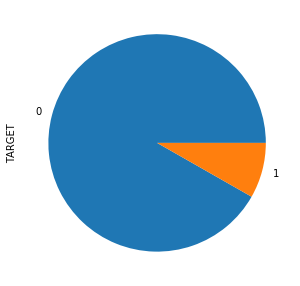

In [269]:
#plotting the pie plot for the TARGET variable present in the application dataset
plt.figure(figsize=[10,5])
app_data.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

Data is very imbalanced over here as in data set only 8% of the total is as defaulter and remaining are non-defaulter.

#### Visualization of different attributes on Target variable (Dividing dataset based on Target variable values)
#### Categorical variable

In [270]:
#adding this column to use this furhter in plotting visualization to calculate % of the values.
app_data['Count'] = 1

In [271]:
def func_plot(attribute):
    plt.figure(figsize=[12,5])
    sns.barplot(x=attribute,y='Count',estimator=lambda x: len(x) / len(app_data), data=app_data, hue='TARGET')
    plt.title(attribute+' '+'distribution plot for Defaulters(1) and Non-Defaulter(0)')
    plt.xlabel(attribute)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage of distribution')
    plt.show()

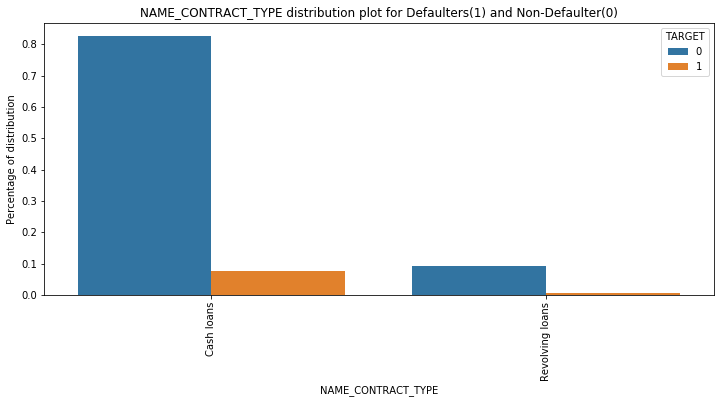

In [62]:
func_plot('NAME_CONTRACT_TYPE')

* Above plot shows that it's safe to have contract type as **Revolving loan** with customer than Cash loans as there are more defaulter in Cash loan.

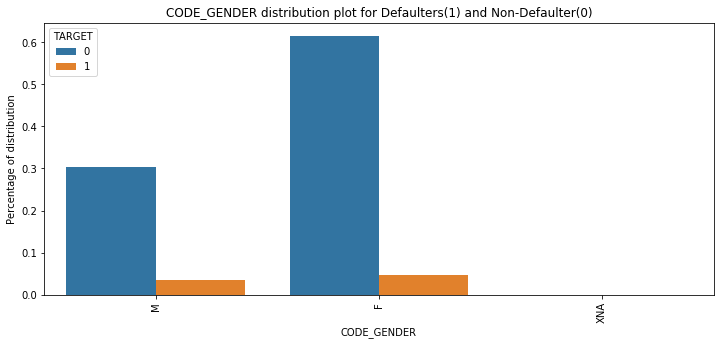

In [63]:
func_plot('CODE_GENDER')

* Male applicants are more likely to be defaulters than the female applicants

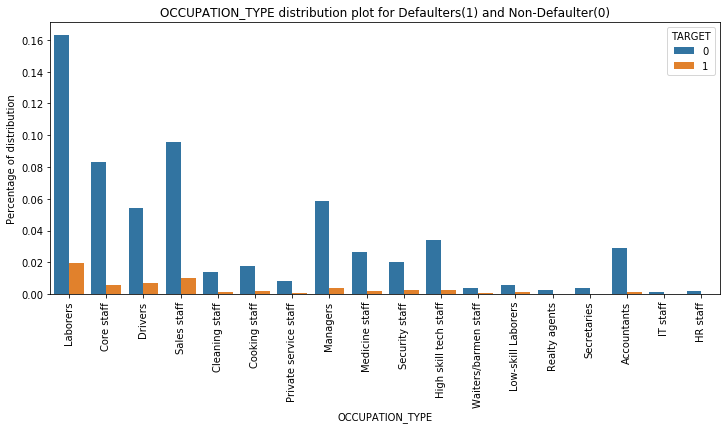

In [105]:
func_plot('OCCUPATION_TYPE')

Laborer and driver are likely to be defaulter 

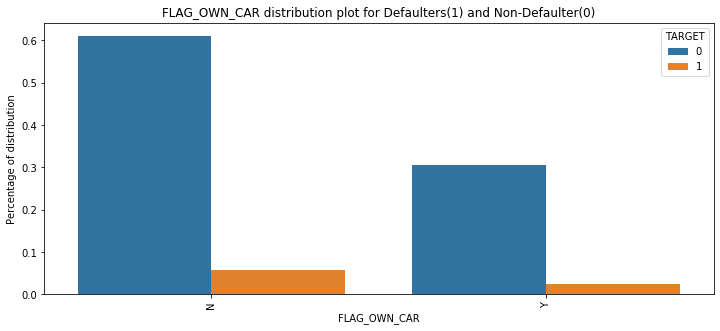

In [64]:
func_plot('FLAG_OWN_CAR')

* The above plot shows a fairly equal chances of customers who own a car being a defaulter/non-defaulter

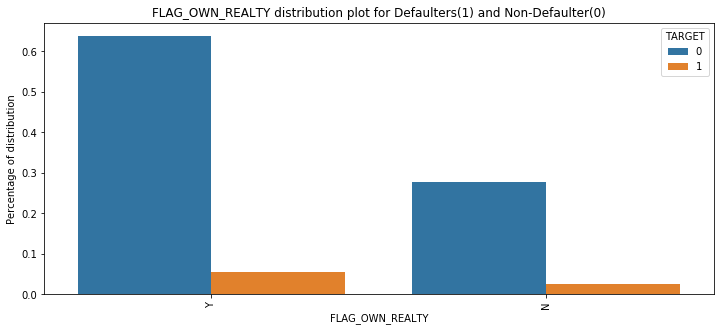

In [65]:
func_plot('FLAG_OWN_REALTY')

* The customers owning a real property are more prone to defaulting

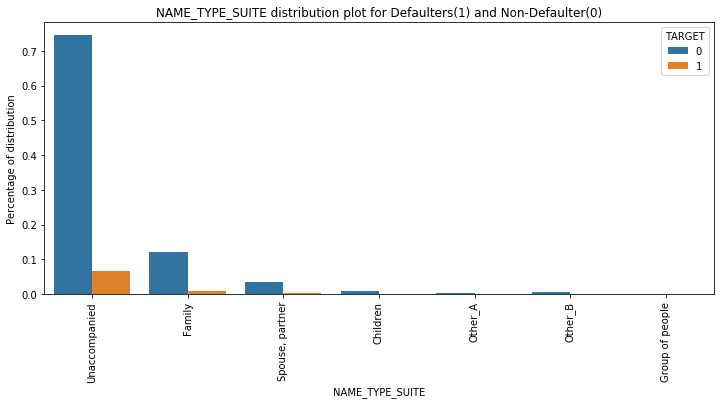

In [66]:
func_plot('NAME_TYPE_SUITE')

* The customer who are accompanied by someone while applying for loan are less likely to be defaulter than the customer who are alone.

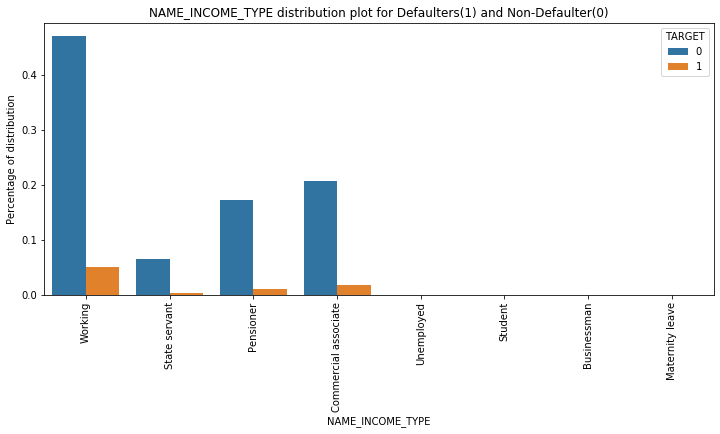

In [67]:
func_plot('NAME_INCOME_TYPE')

* The state servants who work for the government are less prone to be a defaulter.

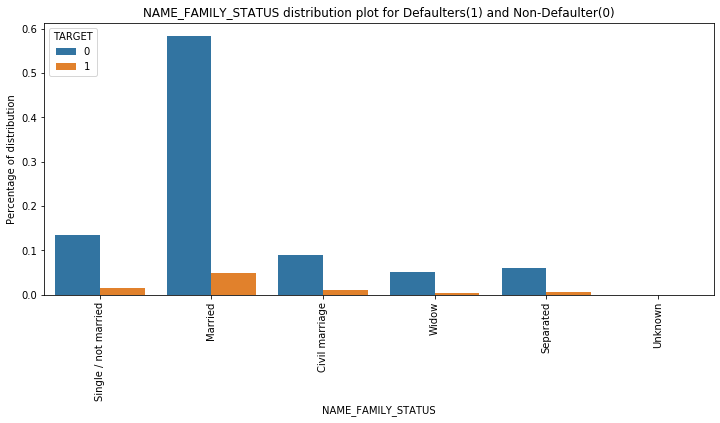

In [68]:
func_plot('NAME_FAMILY_STATUS')

* Married people are more likely to be a defaulter maybe because of the reason that they have a family to feed.

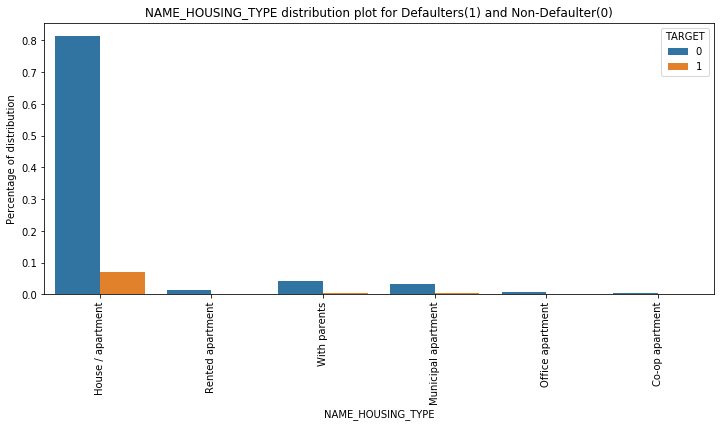

In [69]:
func_plot('NAME_HOUSING_TYPE')

* The customers living with parents are more prone to being defaulters.


**ORGANIZATION_TYPE distribution of defaulters and non-defaulters**

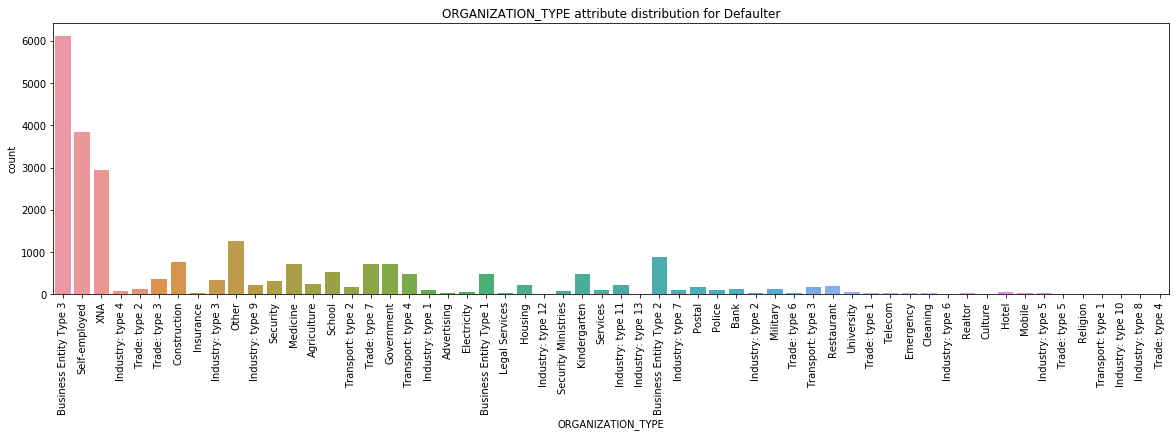

In [70]:
plt.figure(figsize=[20,5])
plt.xticks(rotation=90)
plt.title('ORGANIZATION_TYPE attribute distribution for Defaulter')
sns.countplot('ORGANIZATION_TYPE', data=app_data[app_data.TARGET==1])
plt.show()

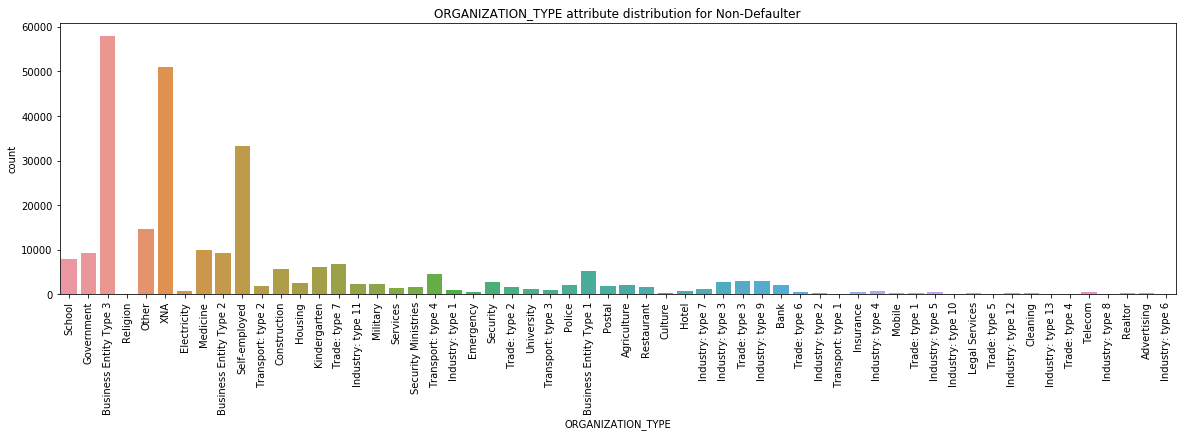

In [71]:
plt.figure(figsize=[20,5])
plt.xticks(rotation=90)
plt.title('ORGANIZATION_TYPE attribute distribution for Non-Defaulter')
sns.countplot('ORGANIZATION_TYPE', data=app_data[app_data.TARGET==0])
plt.show()

* Customers belonging to Business Entity Type 3 & Self Employed category are more likely to be defaulters

**Ordninal categorical variable distribution around TARGET variable**

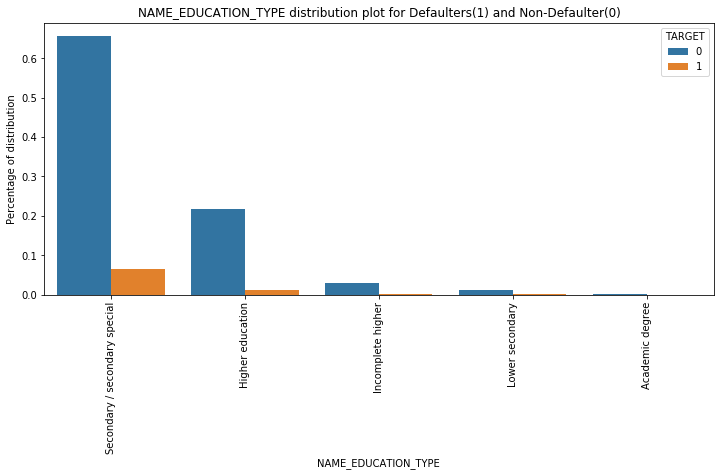

In [72]:
func_plot('NAME_EDUCATION_TYPE')

* The customers who come under the category of Secondary/Secondaray Special and Incomplete Higher education are more likely to be defaulters.

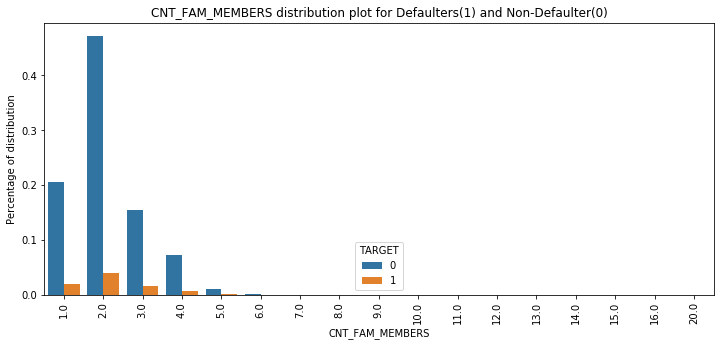

In [73]:
func_plot('CNT_FAM_MEMBERS')

In [74]:
# app_data_1.CNT_FAM_MEMBERS.value_counts(normalize=True), app_data_0.CNT_FAM_MEMBERS.value_counts(normalize=True)

* Customers having count of family members 3 or 4 are more likely to be defaulters

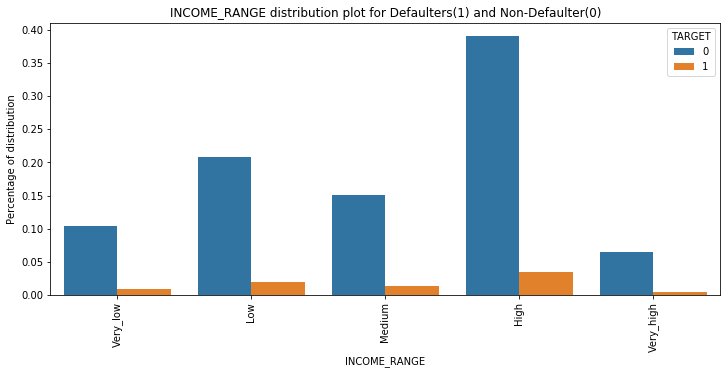

In [75]:
func_plot('INCOME_RANGE')

In [76]:
# app_data_1.INCOME_RANGE.value_counts(normalize=True), app_data_0.INCOME_RANGE.value_counts(normalize=True)

* Customers with low income are more prone to being defaulters

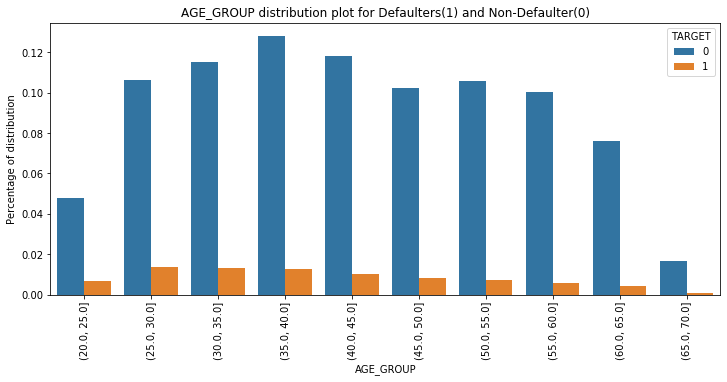

In [77]:
func_plot('AGE_GROUP')

In [78]:
# app_data_1.AGE_GROUP.value_counts(normalize=True), app_data_0.AGE_GROUP.value_counts(normalize=True)

* Therefore, it is better to grant loan to customers who are in the age group 45-65 as tehy are less likely to default.

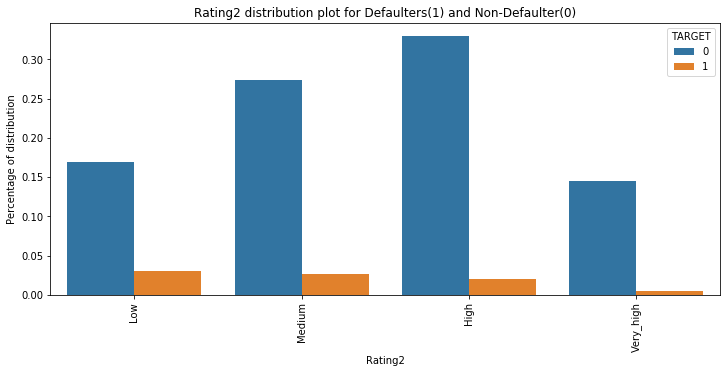

In [79]:
func_plot('Rating2')

In [80]:
# app_data_1.Rating2.value_counts(normalize=True),app_data_0.Rating2.value_counts(normalize=True)

* Customers having low rating from external source 2 are more likely to be defaulters and that is the expectected situated.

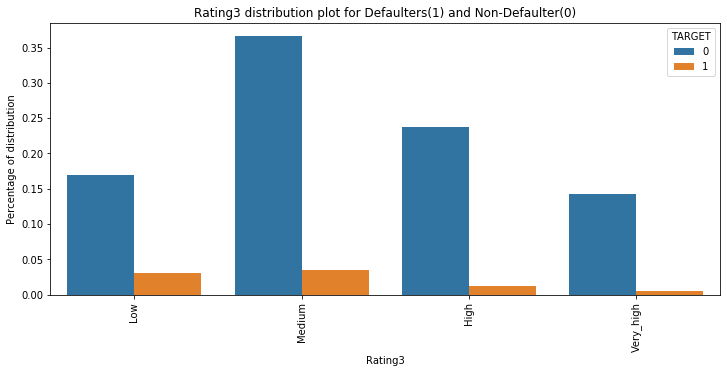

In [81]:
func_plot('Rating3')

In [82]:
# app_data_1.Rating3.value_counts(normalize=True),app_data_0.Rating3.value_counts(normalize=True)

* Customers having low rating from external source 3 are more likely to be defaulters and that is the expectected situated.

#### Univariate Analysis for Continuous numerical variable

In [83]:
#Selecting continuous numerical variable columns for Non-Defaulters

cont_num_col=list(app_data[app_data.TARGET==0].select_dtypes('int64').columns) + list(app_data[app_data.TARGET==0].select_dtypes('float').columns) + list(app_data[app_data.TARGET==0].select_dtypes('int').columns)

num_data_nondef=app_data[app_data.TARGET==0][cont_num_col]
corr_nondef = round(num_data_nondef.corr(), 2)

corr_nondef

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,Total_EXP,Count,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.0,NaN,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,NaN,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.0,NaN,1.00,0.34,-0.05,-0.03,0.00,0.25,0.06,0.00,-0.03,0.02,0.02,0.02,-0.01,-0.01,0.01,0.02,0.02,0.07,0.07,0.00,0.06,-0.00,-0.02,-0.16,-0.00,0.05,-0.00,-0.00,-0.01,0.00,0.00,-0.01,0.00,0.01,0.00,0.00,0.00,0.00,-0.00,-0.34,0.04,NaN,0.03,0.00,0.02,-0.00,-0.03,0.88,-0.02,-0.04,-0.01,0.19,0.02,-0.00,0.02,-0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.03
DAYS_BIRTH,-0.0,NaN,0.34,1.00,-0.01,0.28,-0.00,0.63,0.17,-0.01,-0.04,0.09,0.00,0.00,0.10,0.07,0.10,0.07,0.18,0.25,0.16,0.00,0.11,-0.00,0.02,-0.41,0.00,0.12,0.02,-0.00,0.05,0.00,0.03,0.03,0.01,0.03,0.01,0.05,0.00,0.01,0.03,-1.00,-0.01,NaN,0.09,-0.05,0.02,-0.05,-0.03,0.29,-0.08,-0.17,0.08,0.34,0.01,-0.00,0.01,-0.00,0.00,0.00,-0.00,-0.00,-0.02,-0.08
DAYS_EMPLOYED,0.0,NaN,-0.05,-0.01,1.00,-0.04,-0.00,-0.41,-0.11,0.00,-0.04,0.00,-0.00,0.00,-0.02,0.04,0.03,0.02,0.06,0.01,-0.02,-0.00,-0.14,-0.00,-0.02,0.23,-0.00,-0.02,-0.01,0.00,0.02,0.00,-0.00,0.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,0.01,0.01,-1.00,NaN,-0.10,-0.10,-0.08,-0.10,0.01,-0.07,-0.08,-0.05,0.12,0.04,0.00,0.01,0.00,0.01,-0.00,0.00,-0.00,-0.04,0.00,-0.00
DAYS_ID_PUBLISH,0.0,NaN,-0.03,0.28,-0.04,1.00,-0.00,0.28,0.05,-0.00,-0.04,0.03,-0.01,-0.01,0.04,0.03,0.05,0.04,0.08,0.10,0.06,0.00,0.05,-0.00,0.00,-0.18,0.00,0.03,0.01,-0.00,0.02,-0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.00,0.00,0.02,-0.28,0.03,NaN,0.03,0.00,0.02,-0.00,-0.00,-0.02,-0.04,-0.11,0.09,0.10,-0.01,-0.00,-0.01,0.00,0.00,-0.00,-0.01,-0.02,-0.02,-0.06
FLAG_MOBIL,0.0,NaN,0.00,-0.00,-0.00,-0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,NaN,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
FLAG_EMP_PHONE,-0.0,NaN,0.25,0.63,-0.41,0.28,-0.00,1.00,0.24,-0.01,-0.02,0.06,-0.03,-0.04,0.10,0.04,0.11,0.10,0.09,0.26,0.22,0.00,0.25,-0.00,0.02,-0.60,0.00,0.12,0.02,0.00,0.03,0.00,0.03,0.02,0.01,0.05,0.01,0.04,0.01,0.01,0.01,-0.63,0.38,NaN,0.18,0.07,0.11,0.06,0.00,0.24,0.03,-0.10,-0.03,0.21,-0.01,-0.02,-0.01,-0.02,0.00,0.00,-0.00,0.03,-0.01,-0.04
FLAG_WORK_PHONE,-0.0,NaN,0.06,0.17,-0.11,0.05,0.00,0.24,1.00,0.02,0.30,-0.01,0.01,0.01,0.04,0.06,0.0

In [84]:
#Selecting continuous numerical variable columns for Defaulters

cont_num_col1=list(app_data[app_data.TARGET==1].select_dtypes('int64').columns) + list(app_data[app_data.TARGET==1].select_dtypes('float').columns) + list(app_data[app_data.TARGET==1].select_dtypes('int').columns)

num_data_def=app_data[app_data.TARGET==1][cont_num_col1]
corr_def = round(num_data_def.corr(), 2)

corr_def

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AGE,Total_EXP,Count,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.00,NaN,-0.00,-0.00,-0.00,-0.00,NaN,0.00,0.01,-0.00,0.02,-0.00,-0.00,-0.00,0.00,-0.01,0.00,0.00,0.01,-0.00,-0.00,-0.01,-0.01,NaN,0.00,0.00,0.00,0.00,-0.00,NaN,-0.00,NaN,-0.00,0.00,0.01,-0.00,-0.01,-0.01,-0.01,0.01,0.01,0.00,0.00,NaN,-0.00,-0.01,-0.01,-0.01,0.00,-0.00,0.01,-0.00,0.00,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,0.00,-0.00,0.01
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.00,NaN,1.00,0.26,-0.03,-0.03,NaN,0.20,0.05,0.00,-0.02,0.01,0.04,0.05,-0.02,-0.02,-0.02,-0.01,0.00,0.05,0.06,-0.01,0.07,NaN,-0.02,-0.13,-0.00,0.02,0.00,NaN,-0.01,NaN,-0.00,-0.00,0.00,-0.00,-0.01,0.00,0.00,-0.00,0.00,-0.26,0.02,NaN,-0.00,0.00,0.04,-0.01,-0.03,0.88,-0.01,-0.02,0.01,0.15,0.03,0.00,0.03,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02
DAYS_BIRTH,-0.00,NaN,0.26,1.00,0.04,0.26,NaN,0.58,0.16,-0.01,-0.03,0.06,0.03,0.03,0.06,0.06,0.07,0.05,0.16,0.22,0.13,-0.01,0.13,NaN,0.01,-0.39,0.00,0.07,0.01,NaN,0.04,NaN,0.01,0.01,0.01,0.01,-0.00,0.03,-0.00,-0.00,0.03,-1.00,-0.06,NaN,0.00,-0.14,-0.01,-0.14,-0.05,0.20,-0.11,-0.13,0.11,0.29,-0.00,0.01,-0.00,0.00,0.01,-0.01,-0.01,-0.01,-0.02,-0.09
DAYS_EMPLOYED,-0.00,NaN,-0.03,0.04,1.00,0.01,NaN,-0.32,-0.09,-0.00,-0.04,0.00,0.01,0.00,-0.02,0.04,0.04,0.03,0.08,0.04,0.00,-0.01,-0.13,NaN,-0.03,0.19,0.00,-0.01,-0.01,NaN,0.03,NaN,0.00,0.00,0.01,-0.00,-0.02,-0.00,0.00,-0.01,0.01,-0.04,-1.00,NaN,-0.06,-0.10,-0.07,-0.10,-0.01,-0.06,-0.08,-0.02,0.15,0.05,-0.03,0.00,-0.03,0.00,0.00,-0.00,-0.01,-0.03,0.01,-0.03
DAYS_ID_PUBLISH,-0.00,NaN,-0.03,0.26,0.01,1.00,NaN,0.23,0.02,0.01,-0.04,0.03,0.00,-0.00,0.02,0.03,0.03,0.02,0.07,0.07,0.03,-0.01,0.03,NaN,-0.00,-0.15,-0.01,0.02,0.02,NaN,0.02,NaN,0.00,-0.00,0.00,-0.00,0.01,0.01,-0.01,-0.01,0.02,-0.25,-0.02,NaN,-0.00,-0.05,-0.01,-0.06,-0.01,-0.03,-0.06,-0.08,0.13,0.10,-0.02,0.01,-0.02,0.00,0.00,-0.01,-0.00,-0.02,-0.01,-0.07
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_EMP_PHONE,0.00,NaN,0.20,0.58,-0.32,0.23,NaN,1.00,0.21,-0.01,-0.01,0.04,-0.00,-0.00,0.06,0.03,0.09,0.08,0.09,0.25,0.20,0.00,0.28,NaN,0.02,-0.62,0.00,0.10,0.02,NaN,0.02,NaN,0.01,0.01,0.01,0.03,0.00,0.03,0.01,0.01,0.01,-0.58,0.29,NaN,0.12,-0.00,0.09,-0.01,-0.02,0.19,-0.00,-0.08,-0.00,0.19,0.01,-0.00,0.01,-0.00,0.01,-0.02,-0.01,0.02,-0.01,-0.03
FLAG_WORK_PHONE,0.01,NaN,0.05,0.16,-0.09,0.02,NaN,0.21,1.00,0.02,0.31,-0.01,0.01,0.02,0.04,0.08,0.08,0.05,0.03,0.10,0.10,-0.01,0.06,NaN,0.04,-0.13,0.01,0.01,-0.00,NaN,0.09,NaN,0.01,0.

In [85]:
num_data_def.FLAG_MOBIL.value_counts()

1    24273
Name: FLAG_MOBIL, dtype: int64

In [86]:
unstack_nondef=corr_nondef.unstack()
unstack_nondef.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.00
AMT_CREDIT                   AMT_GOODS_PRICE                0.98
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.95
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.88
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.86
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.83
AMT_GOODS_PRICE              AMT_ANNUITY                    0.77
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.63
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION     0.45
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY         0.44
AMT_ANNUITY                  AMT_INCOME_TOTAL               0.43
AGE                          FLAG_DOCUMENT_6                0.41
FLAG_EMP_PHONE               Total_EXP                      0.38
AMT_GOODS_PRICE              AMT_INCOME_TOTAL               0.35
CNT_CHILDREN                 DAYS_BIRTH                     0.34
OBS_60_CNT_SOCIAL_CIRCLE 

**AMT_CREDIT & AMT_GOODS_PRICE are perfectly positively corelated whereas 
AGE & FLAG_EMP_PHONE are perfectly negatively corelated amongst the Non-Defaulters**


In [87]:
unstack_def=corr_def.unstack()
unstack_def.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.00
AMT_GOODS_PRICE              AMT_CREDIT                     0.98
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.96
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.88
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.87
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.85
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.78
AMT_ANNUITY                  AMT_GOODS_PRICE                0.74
DAYS_BIRTH                   FLAG_EMP_PHONE                 0.58
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.50
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY         0.47
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.40
FLAG_DOCUMENT_6              AGE                            0.39
OBS_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.34
DEF_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.33
REG_CITY_NOT_LIVE_CITY   

**AMT_GOODS_PRICE & AMT_CREDIT are perfectly positively corelated
FLAG_DOCUMENT_6 & FLAG_EMP_PHONE are perfectly negatively corelated amongst the Defaulters**        

In [88]:
#Dividing the application dataset based upon TARGET field for future use

app_data_0 = app_data[app_data['TARGET']==0] #dataset conatining non-defaulter data
app_data_1 = app_data[app_data['TARGET']==1] #dataset containing defaulter data

In [89]:
#function definition for vizualization of continuous variables

def func_plot_cont(attribute):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    app_data_1[attribute].plot.hist()
    plt.title(attribute+''+' Distribution for Defaulters')
    plt.xlabel(attribute)
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    app_data_0[attribute].plot.hist()
    plt.title(attribute+''+' Distribution for Non-Defaulters')
    plt.xlabel(attribute)
    plt.xticks(rotation=90)
    plt.show()

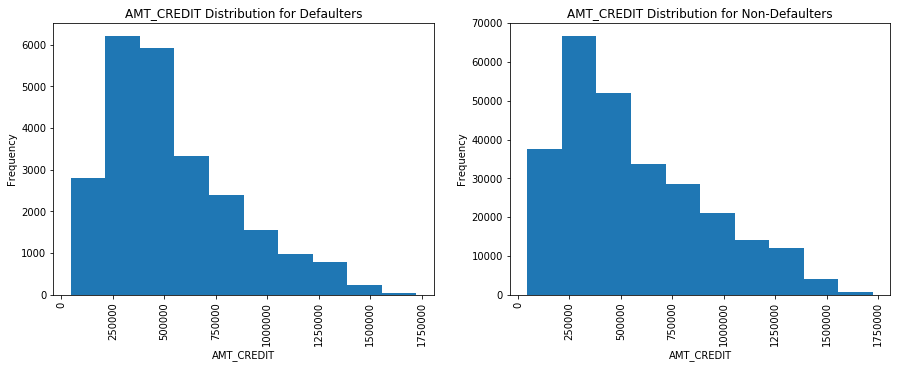

In [90]:
func_plot_cont('AMT_CREDIT')

* The are higher chances of being a defaulter if the customer is taking a loan between 2.5 - 5 lakhs on the distribution of defaulters

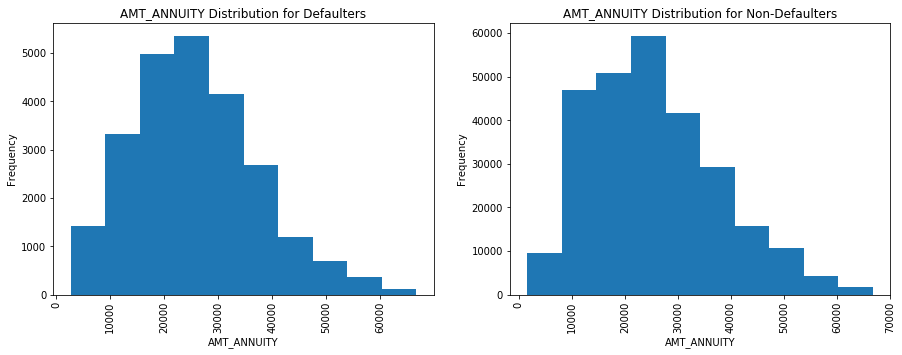

In [91]:
func_plot_cont('AMT_ANNUITY')

* The are higher chances of being a defaulter if the customer is paying an annuity between 0 - 10000 on the distribution of defaulters

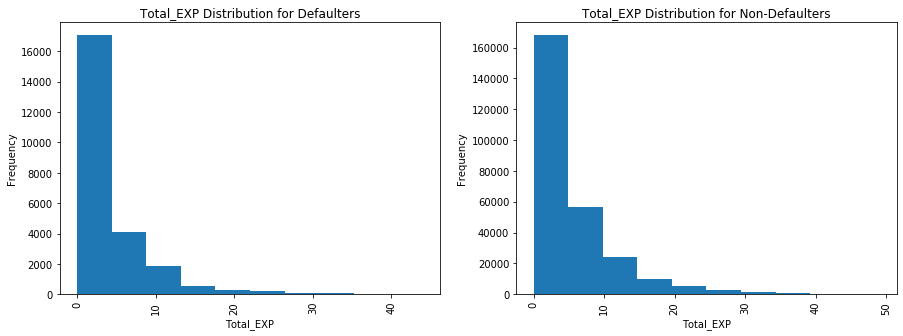

In [92]:
func_plot_cont('Total_EXP')

* The are higher chances of being a defaulter if the customer is having a total work experience in the range of 10 - 15 yrs on the distribution of defaulters

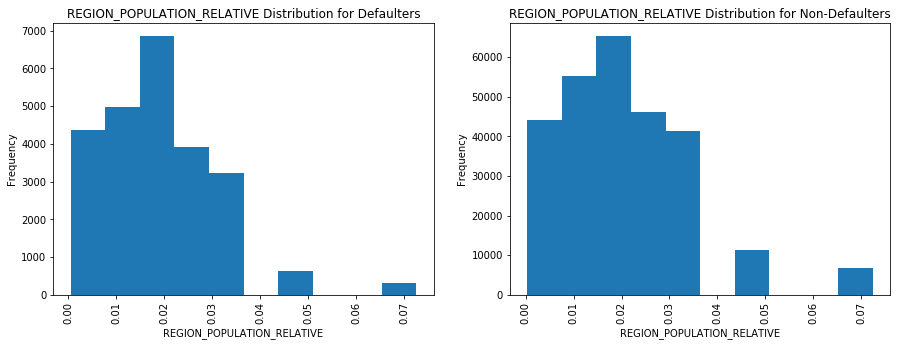

In [93]:
func_plot_cont('REGION_POPULATION_RELATIVE')

* Customers living in higher density areas are less likely to be Defaulters

### Analysis based upon Gender of Customer

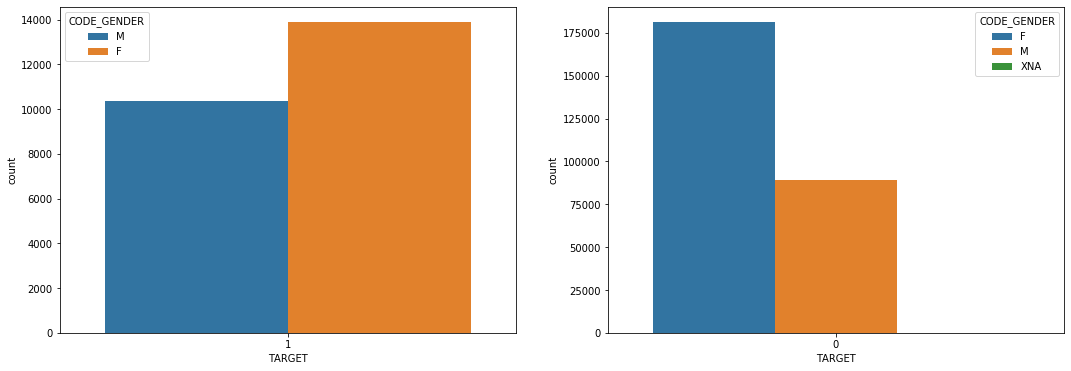

In [104]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x='TARGET', data=app_data_1, hue='CODE_GENDER')
plt.subplot(1,2,2)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=app_data_0)
plt.show()


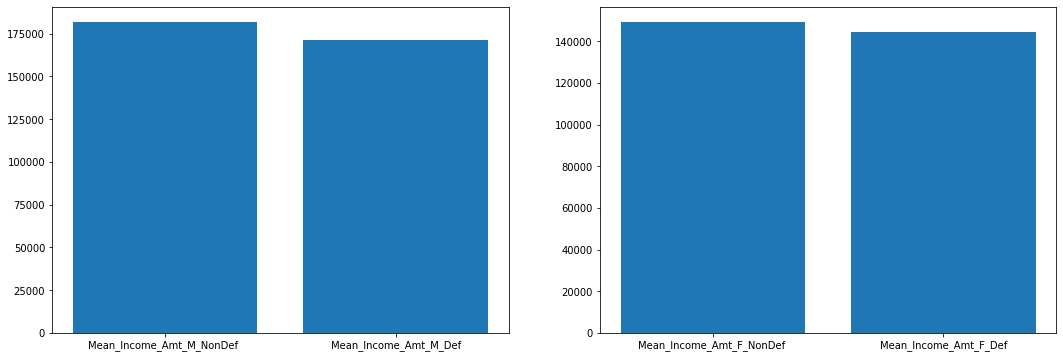

In [101]:
#vizualization of mean income amount of Male(M) vs Female(F)


XM = ['Mean_Income_Amt_M_NonDef ','Mean_Income_Amt_M_Def']

XF = ['Mean_Income_Amt_F_NonDef ','Mean_Income_Amt_F_Def']

YM = [app_data_0[app_data_0.CODE_GENDER=='M']['AMT_INCOME_TOTAL'].mean(),app_data_1[app_data_1.CODE_GENDER=='M']['AMT_INCOME_TOTAL'].mean()]

YF = [app_data_0[app_data_0.CODE_GENDER=='F']['AMT_INCOME_TOTAL'].mean(),app_data_1[app_data_1.CODE_GENDER=='F']['AMT_INCOME_TOTAL'].mean()]


plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(XM,YM)

plt.subplot(122)
plt.bar(XF,YF)

plt.show()

* There is not much significant difference in the mean income of Male/Female defaulter and non-defaulter.

## Bivariate Analysis

In [102]:
#function definition for bivariate analysis

def plotbivarcontcont(var1,var2):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var1,y=var2,data=app_data_0)
    plt.title('TARGET=0')
    plt.xlabel(var1)
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=var1,y=var2,data=app_data_1)
    plt.title('TARGET=1')
    plt.xlabel(var1)
    plt.xticks(rotation=90)
    plt.show()

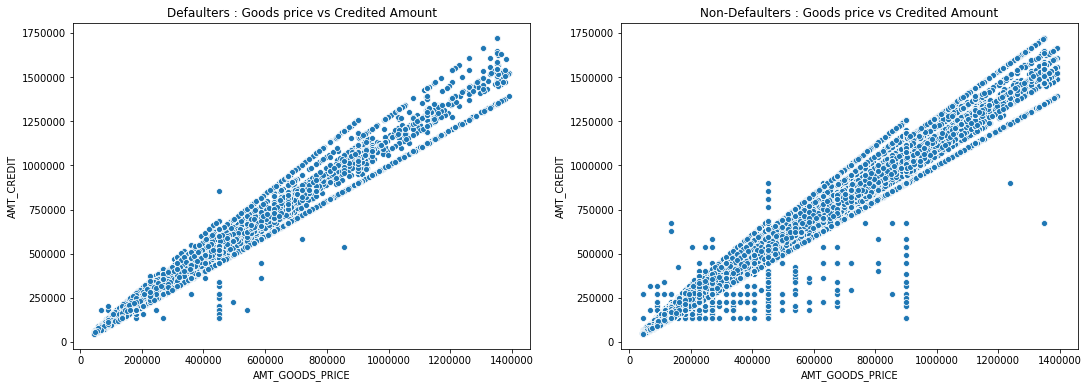

In [103]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)

sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=app_data_1)
plt.title('Defaulters : Goods price vs Credited Amount')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=app_data_0)
plt.title('Non-Defaulters : Goods price vs Credited Amount')


plt.show()

* Defaulters are more for Goods prices upto 4 lakhs and amount credited upto 2.5 lakhs 

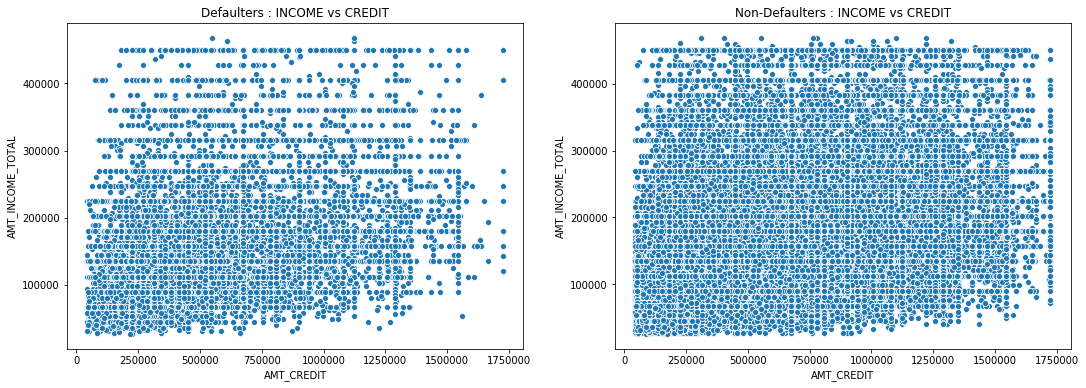

In [107]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=app_data_1)
plt.title('Defaulters : INCOME vs CREDIT')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=app_data_0)
plt.title('Non-Defaulters : INCOME vs CREDIT')
plt.show()

* There are less chance of being defaulter with the income greater than 3 lac and amount credit greater than 15 lac.

### Merging the dataset (application and previous application data set)

In [109]:
#checking the shape of previous application dataset
prev_app_data.shape

(1670214, 26)

In [126]:
app_data.shape

(294469, 80)

In [110]:
#checking for null values in previous application dataset

prev_app_data.isnull().sum()*100/len(prev_app_data)

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


In [113]:
#merging the application dataset & previous application dataset

merged_dataset = pd.merge(app_data, prev_app_data, on=['SK_ID_CURR'])

In [114]:
#checking the shape of merged dataset

merged_dataset.shape

(1361632, 105)

In [115]:
merged_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,Total_EXP,INCOME_RANGE,Rating2,Rating3,Count,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,"(20.0, 25.0]",1,High,Low,Low,1,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,"(40.0, 45.0]",3,High,High,Medium,1,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,"(40.0, 45.0]",3,High,High,Medium,1,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,"(40.0, 45.0]",3,High,High,Medium,1,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the ba

In [123]:
#for displaying all the column headers

pd.set_option('display.max_columns', None)

In [125]:
#loop for displaying all the column headers
for col in merged_dataset.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE_x
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START_x
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_

#### Categorizing the merged dataset into 4 categories:
* Approved
* Cancelled
* Refused
* Unused offer

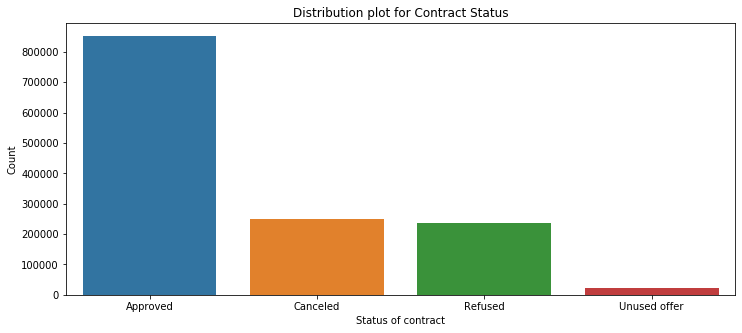

In [130]:
#vizualization of 4 categories of merged dataset based upon Status of Contract
plt.figure(figsize=[12,5])
sns.countplot(merged_dataset.NAME_CONTRACT_STATUS)
plt.xlabel("Status of contract")
plt.ylabel("Count")
plt.title("Distribution plot for Contract Status")
plt.show()

In [133]:
def func_plot(attribute):
    plt.figure(figsize=[12,5])
    sns.barplot(x=attribute,y='Count',estimator=lambda x: len(x) / len(merged_dataset), data=merged_dataset, hue='TARGET')
    plt.title(attribute+' '+'distribution plot for Defaulters(1) and Non-Defaulter(0)')
    plt.xlabel(attribute)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage of distribution')
    plt.show()

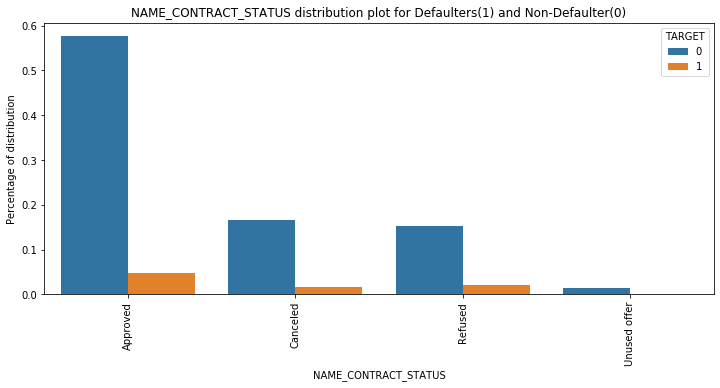

In [134]:
func_plot('NAME_CONTRACT_STATUS')

* Customer which were previously Refused and Cancelled are having higher default rate.

In [171]:
def func_plot(attribute):
    plt.figure(figsize=[15,5])
    sns.barplot(x='NAME_CONTRACT_STATUS',y=attribute, estimator=np.mean, data=merged_dataset, hue='TARGET')
    plt.title(attribute+' '+'distribution plot for Defaulters(1) and Non-Defaulter(0)')
    plt.xlabel(attribute)
    plt.xticks(rotation=90)
    plt.ylabel('Average'+' '+attribute)
    plt.show()

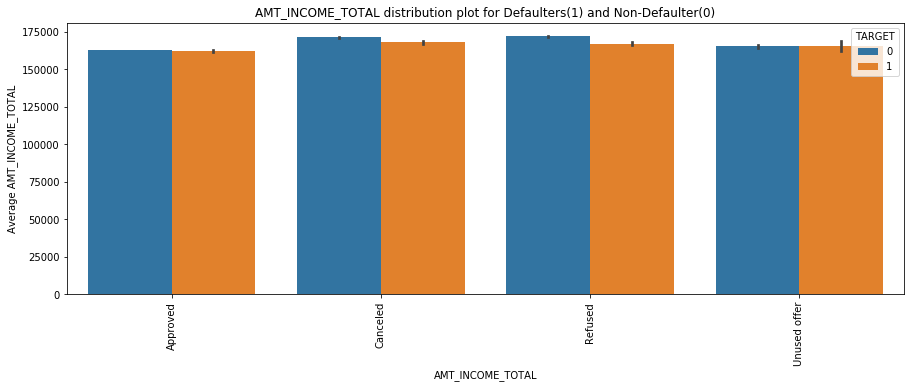

In [172]:
func_plot('AMT_INCOME_TOTAL')

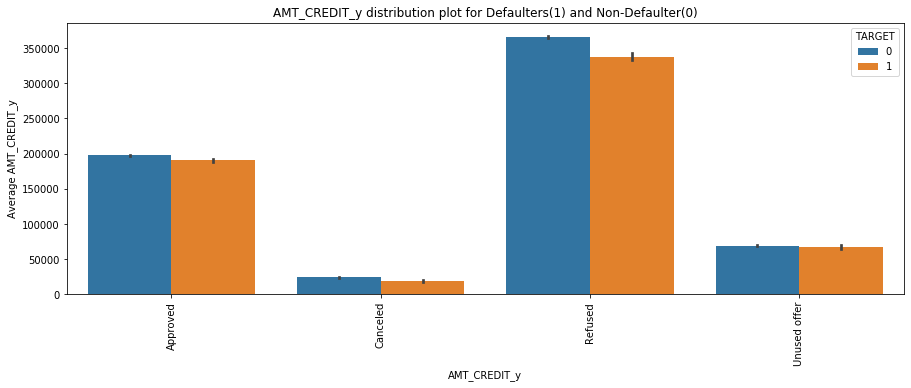

In [173]:
func_plot('AMT_CREDIT_y')

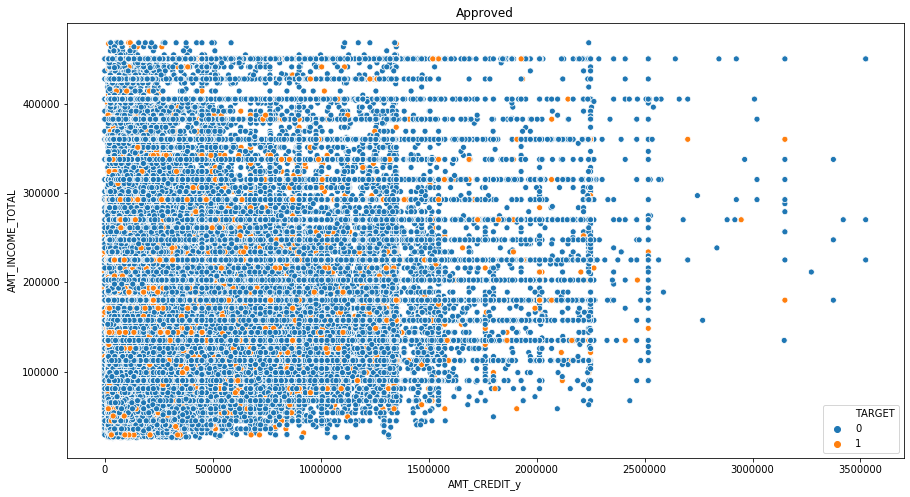

In [177]:

plt.figure(figsize=[15,8])
sns.scatterplot(x='AMT_CREDIT_y',y='AMT_INCOME_TOTAL',hue='TARGET',data=merged_dataset[merged_dataset.NAME_CONTRACT_STATUS=='Approved'])
plt.title('Approved')
plt.show()

* For the customer whose loan application approved, having income total upto 3.5 lac and amount credit upto 10 lac are more likely to be defaulters.

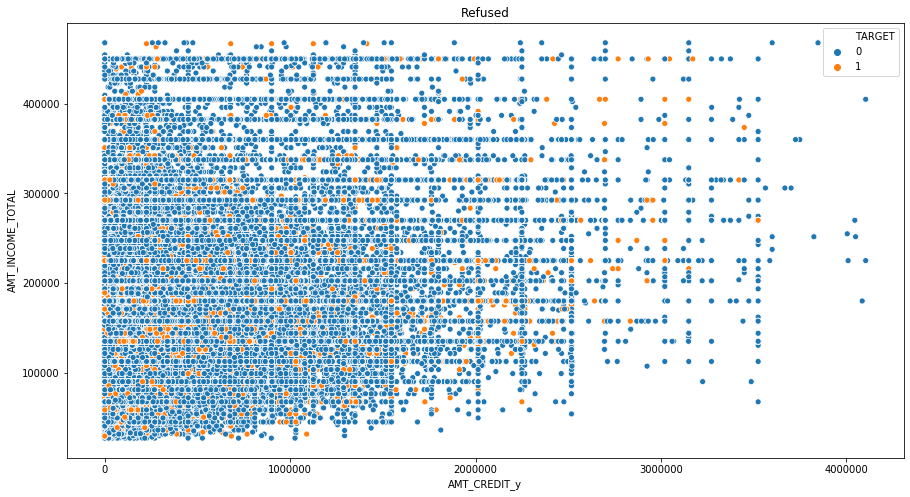

In [178]:
plt.figure(figsize=[15,8])
sns.scatterplot(x='AMT_CREDIT_y',y='AMT_INCOME_TOTAL',hue='TARGET',data=merged_dataset[merged_dataset.NAME_CONTRACT_STATUS=='Refused'])
plt.title('Refused')
plt.show()

* For customer whose application has been refused, having income upto 2.5 lacs and amount credit upto 8 lacs would have been defaulter.

### Conclusions

* The Bank should focus majorly on the revolving loan type with that should prioritize female customers more as they are less likely to be defaulters.
* The bank should strictly avoid customers who are unaccompanied at the time of loan application. A guarantor can be a good option in such a case.
* There are large number of customers from working class but their chances of being a defaulter is also high. 
* Banks can focus to gain the customers from the working class but from single or unmarried category.
* Banks should prioritize the educated people in the age range 45-65 while granting loan.
* Banks should consider the ratings from external sources.
* The proportion of customers owning a real estate property is more but at the same time their chances of being a defaulter is high. Banks can provide collateral loans on their property to recover the amount later.
